<a href="https://colab.research.google.com/github/mounyah/SF_inter/blob/main/TASK06_SF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Author: HADJEBAR Mounia**

# **TASK 05**: Prediction using Decision Tree Algorithm

### **Import libraries**

In [1]:

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import datasets
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn import tree
from sklearn.metrics import classification_report

### **Import dataset**

In [2]:
# Loading the iris dataset
iris=datasets.load_iris()
data=pd.DataFrame(iris.data, columns=iris.feature_names)
target = pd.DataFrame(iris.target, columns=['target'])
print(data.head(5))

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2


The Iris dataset is loaded using scikit-learn's load_iris() function. It consists of features (data) and labels (target)

### **Data Cleaning and Preparation:**

This part involves checking for missing values, dropping duplicate rows, and possibly detecting and removing outliers from the data

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


Data types are correct and we don't need to do any modification.

In [4]:
#check for missing values drop duplicates:
iris_df = pd.concat([data, target], axis=1)
iris_df.drop_duplicates(inplace=True)

data = iris_df.drop(columns='target')
target = iris_df['target']
data.isna().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
dtype: int64

There is no missing values.

In [5]:
def detect_outliers_iqr(data, threshold=1.5):
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - threshold * IQR
    upper_bound = Q3 + threshold * IQR
    outliers = (data < lower_bound) | (data > upper_bound)
    return outliers

def remove_outliers(data, outliers):
    return data[~outliers]
#Detect and remove outliers
outliers = detect_outliers_iqr(data)
data_cleaned = remove_outliers(data, outliers)

### **Exploratory data analysis**

Now, let explore the data to gain insights about the data:
This section explores the dataset by examining its shape, unique target values, summary statistics, and visualizing the distributions of the features using box plots and histograms.

In [6]:
print(data.shape)
print(target.shape)

(149, 4)
(149,)


In [7]:
print(np.unique(target))

[0 1 2]


In [8]:
data.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,149.000000,149.000000,149.000000,149.000000
mean,5.843624,3.059732,3.748993,1.194631
std,0.830851,0.436342,1.767791,0.762622
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.300000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


<Axes: >

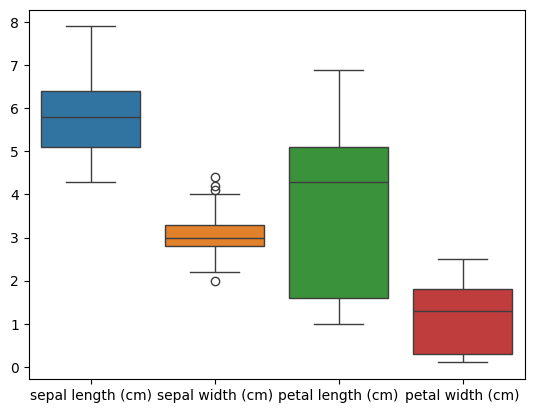

In [9]:
sns.boxplot(data)

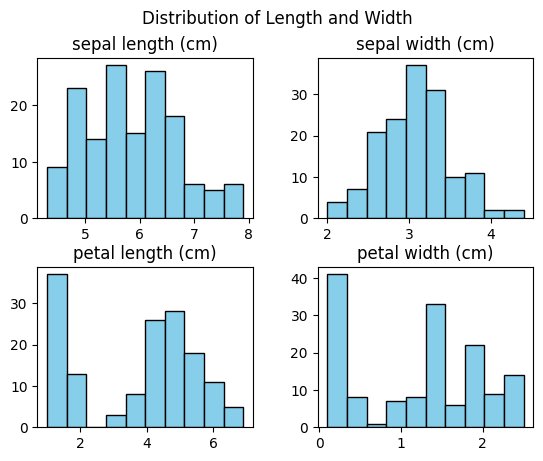

In [10]:
data.hist(grid=False, color='skyblue', edgecolor='black')
plt.suptitle('Distribution of Length and Width')
plt.show()

### **Declare feature vector and target**

Features and labels are separated into feature vectors (X) and target (y) variable

In [11]:
X = data
y = target

### **Split data into separate training and test set**

The dataset is split into training and testing subsets using the train_test_split() function from scikit-learn

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, test_size=0.2)
X_train.shape, X_test.shape

((119, 4), (30, 4))

### **Decision Tree Classifier**

Decision Tree Classifier is created and trained on the training data

In [13]:
model = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=690)
model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=690)

### **Model Evaluation**

Evaluate the performance of the Decision Tree Classifier on both the training and test sets.

In [14]:
y_pred = model.predict(X_test)
print('Model accuracy score with criterion gini index: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with criterion gini index: 0.9667


In [15]:
print('Training set score: {:.4f}'.format(model.score(X_train, y_train)))
print('Test set score: {:.4f}'.format(model.score(X_test, y_test)))

Training set score: 0.9664
Test set score: 0.9667


In [16]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       0.88      1.00      0.93         7
           2       1.00      0.89      0.94         9

    accuracy                           0.97        30
   macro avg       0.96      0.96      0.96        30
weighted avg       0.97      0.97      0.97        30



### **Visualization**

The decision tree model is visualized using the plot_tree() function from scikit-learn's tree module, providing insights into the decision-making process of the classifier

[Text(0.375, 0.875, 'x[3] <= 0.8\ngini = 0.665\nsamples = 119\nvalue = [36, 43, 40]'),
 Text(0.25, 0.625, 'gini = 0.0\nsamples = 36\nvalue = [36, 0, 0]'),
 Text(0.5, 0.625, 'x[3] <= 1.75\ngini = 0.499\nsamples = 83\nvalue = [0, 43, 40]'),
 Text(0.25, 0.375, 'x[2] <= 4.95\ngini = 0.159\nsamples = 46\nvalue = [0, 42, 4]'),
 Text(0.125, 0.125, 'gini = 0.048\nsamples = 41\nvalue = [0, 40, 1]'),
 Text(0.375, 0.125, 'gini = 0.48\nsamples = 5\nvalue = [0, 2, 3]'),
 Text(0.75, 0.375, 'x[2] <= 4.85\ngini = 0.053\nsamples = 37\nvalue = [0, 1, 36]'),
 Text(0.625, 0.125, 'gini = 0.5\nsamples = 2\nvalue = [0, 1, 1]'),
 Text(0.875, 0.125, 'gini = 0.0\nsamples = 35\nvalue = [0, 0, 35]')]

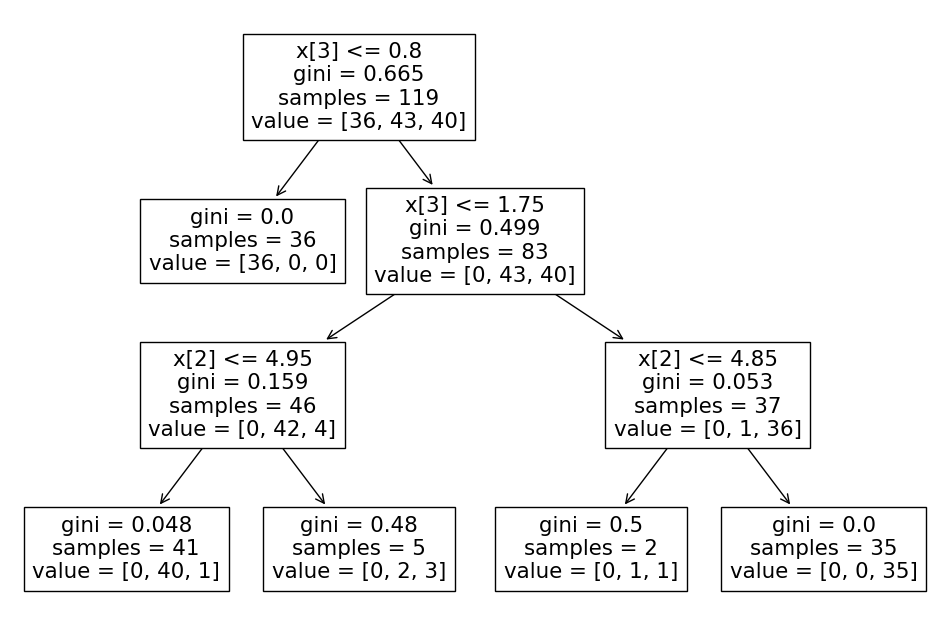

In [17]:
plt.figure(figsize=(12,8))
tree.plot_tree(model.fit(X_train, y_train))